# 3.1. Basic Statistics: Blood Pressure Analysis

#### Using Statistics in Python
1. How to import libaries like Pandas and Numpy
2. How to read in data
3. How to plot histograms and other graphs
4. Conducting hypothesis testing and finding signifigance (p-value)

---

First we need to import any libraries we want to use in this code. For basic statistics of a database saved as a .csv, we'll be using the Pandas Library. Now, everytime we reference pd, the code will read it as "pandas"

In [1]:
import pandas as pd

There'a an import error because we never installed the library to our computer for it to import. So, we first need to use pip command to install the package to our computer

```Command in Terminal: pip install pandas```

For the rest of this exercise, we'll also need some more libraries
##### TODO: Explain what this is (one sentence)

In [2]:
# pip install matplotlib
import matplotlib.pyplot as plt

Now we need to import our excel dataset and look at it; this can be done with the `read_csv` command which returns a `pandas.DataFrame` object.

In [3]:
df = pd.read_csv("./data/notional_blood_pressure_data.csv")

In [4]:
print("Head\n---")
print(df.head(5)) # prints the first 5 rows of df
print()
print("Length\n---")
print(len(df))    # prints the total length of df
print()
print("Columns\n---")
print(df.columns) # prints the names of the columns
print()

Head
---
   id first_name  last_name                     email  systolic_bp  age  \
0   1     Mollie    Gehring     mgehring0@weather.com          147   30   
1   2        Noe  Kornyakov    nkornyakov1@oracle.com          103   35   
2   3        Rem    Gibberd      rgibberd2@smh.com.au          143   46   
3   4      Ketti     Ferres  kferres3@hugedomains.com          102   56   
4   5     Dannye       Jura      djura4@wordpress.com          154   23   

   diastolic_bp  
0            73  
1            61  
2            81  
3            90  
4            65  

Length
---
200

Columns
---
Index(['id', 'first_name', 'last_name', 'email', 'systolic_bp', 'age',
       'diastolic_bp'],
      dtype='object')



Notice pandas assigns a "row index" starting at 0, which is different from our "id" variable. Let's make the index match our id:

In [5]:
df = df.set_index("id")
print(df.head(2))

   first_name  last_name                   email  systolic_bp  age  \
id                                                                   
1      Mollie    Gehring   mgehring0@weather.com          147   30   
2         Noe  Kornyakov  nkornyakov1@oracle.com          103   35   

    diastolic_bp  
id                
1             73  
2             61  


In [6]:
df.iloc[1] # now with our index set, we can call specific indexes 

first_name                         Noe
last_name                    Kornyakov
email           nkornyakov1@oracle.com
systolic_bp                        103
age                                 35
diastolic_bp                        61
Name: 2, dtype: object

Let's take a closer look at our numerical data of `age`, `systolic_bp` and `diastolic_bp`. Pandas allows us to plot histograms of each column:

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

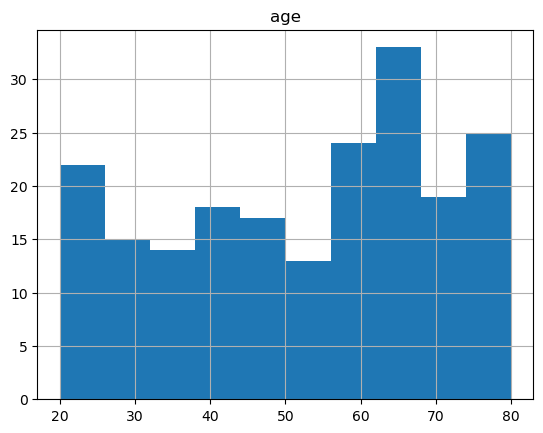

In [7]:
df.hist("age")

array([[<AxesSubplot:title={'center':'systolic_bp'}>]], dtype=object)

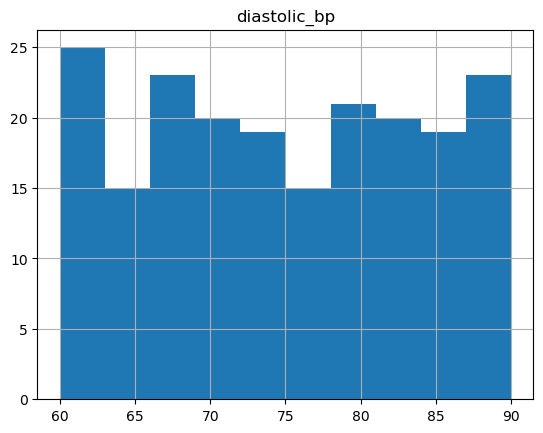

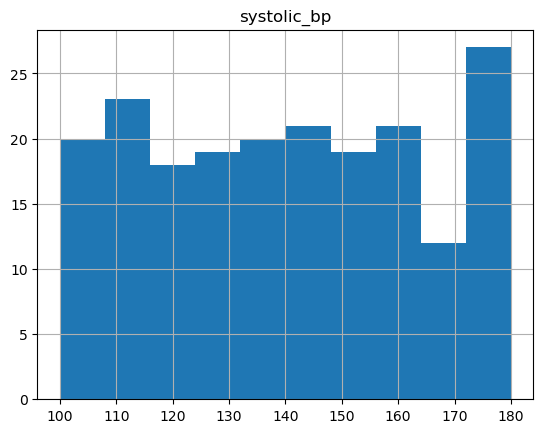

In [8]:
df.hist("diastolic_bp")
df.hist("systolic_bp")

Now that we have a sense of what our data generally looks like, let's do some calculations.

Mean arterial pressure (MAP) is a common clinical metric. We want to make a new column with this value in our dataframe

```MAP = (Systolic + (2 × Diastolic))/3```

In [9]:
df["MAP"] = (df["systolic_bp"]+(2*df["diastolic_bp"])) / 3
df.MAP.head(5) # Notice, this is another way to call the "MAP" column of the dataframe

id
1     97.666667
2     75.000000
3    101.666667
4     94.000000
5     94.666667
Name: MAP, dtype: float64

Let's combine these to make a full figure with both age and MAP together. First we need to make a new variable that will frame the two charts in 1 figure:

Text(0, 0.5, 'Frequency')

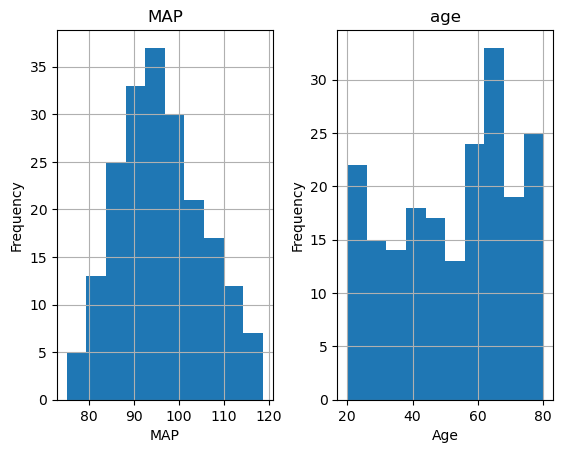

In [10]:
ax= df.hist(column=['MAP','age'])
ax=ax[0] #needed to tell the program to expect multiple labels
ax[0].set_xlabel("MAP")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Frequency")

In [11]:
#Now that we have MAP calculated for all of our patients, we can look at some statistics

# Calculate mean, mode, and standard deviation
mean_value = df['MAP'].mean()
mode_value = df['MAP'].mode()[0]  # mode() returns a Series, get the first value
std_dev = df['MAP'].std()

# Calculate quartiles
quartiles = df['MAP'].quantile([0.25, 0.5, 0.75])
print("Mean = " + str(mean_value))
print("Mode = " + str(mode_value))
print("Standard Deviation = " + str(std_dev))
print("Quartiles = " + str(quartiles))

Mean = 96.1866666666667
Mode = 96.66666666666667
Standard Deviation = 9.267212545530745
Quartiles = 0.25     89.25
0.50     96.00
0.75    102.75
Name: MAP, dtype: float64


Other libraries like scipy have pre-built commands for curve fitting. Lets fit our MAP data, which looks like a normal distribution from our previous histogram.

Don't forget to pip install the scipy library before calling it in your code. Another very important tool is numpy, which we also need to import.

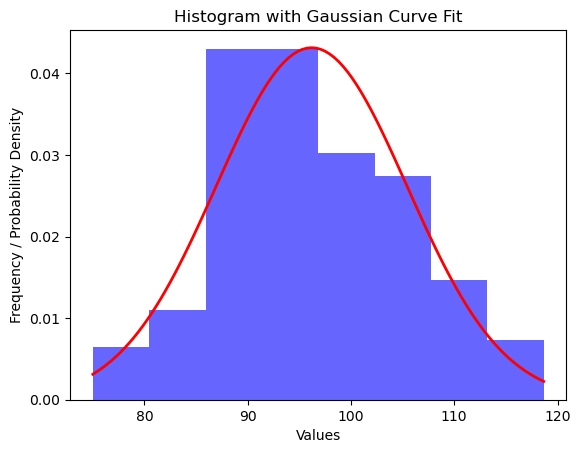

In [12]:
#pip install scipy
from scipy import stats
#pip install numpy
import numpy as np

mu, sigma = stats.norm.fit(df['MAP'])
x = np.linspace(df['MAP'].min(), df['MAP'].max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Create a histogram with the fitted Gaussian curve
plt.hist(df['MAP'], bins=8, density=True, alpha=0.6, color='b')
plt.plot(x, pdf, 'r', linewidth=2)
plt.xlabel('Values')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram with Gaussian Curve Fit')
plt.show()

Scipy also has prebuilt commands to do statistical tests like t-tests and ANOVAs. Let's assume the national average for MAP is 85. Let's do a one way T test to see if our population's mean is statistically different than the national average:

In [13]:
# Define the hypothesized mean
hypothesized_mean = 85

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['MAP'], hypothesized_mean)

# Define significance level (alpha). 0.05 is a typical threshold for signifigance
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject the null hypothesis: Mean is different from", hypothesized_mean)
else:
    print("Fail to reject the null hypothesis: Mean is not significantly different from", hypothesized_mean)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

Reject the null hypothesis: Mean is different from 85
T-statistic: 17.07129909886079
P-value: 7.71008075627118e-41


We can also run an ANOVA on age groups to see if different age ranges have different values. For comparing means, we can do a one-way ANOVA, which can convieniently be done with scipy.

In [14]:
# Define age groups
age_bins = [20, 30, 40, 50, 60, 70]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70']

# Add an 'AgeGroup' column based on age bins
df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# One-way ANOVA
one_way_result = stats.f_oneway(
    df[df['AgeGroup'] == '20-30']['MAP'],
    df[df['AgeGroup'] == '40-50']['MAP'],
    df[df['AgeGroup'] == '60-70']['MAP']
)

print("One-way ANOVA:")
print("F-statistic:", one_way_result.statistic)
print("P-value:", one_way_result.pvalue)

if one_way_result.pvalue > 0.05:
    print("Groups are not statistically different")
else:
    print("At least one group is statistically signifigant")   

One-way ANOVA:
F-statistic: 1.1873593767149908
P-value: 0.3095581955200718
Groups are not statistically different


Let's bring it all together now. At the end of this, we'd like to format all of this information like we're making a figure.

Let's plan to have 3 parts, along with the statistics we just calculated:
1. Age distribution of study
2. MAP related to age
3. MAP Histogram with a curve fit
4. Mean comparisons between age groups with ANOVA stats

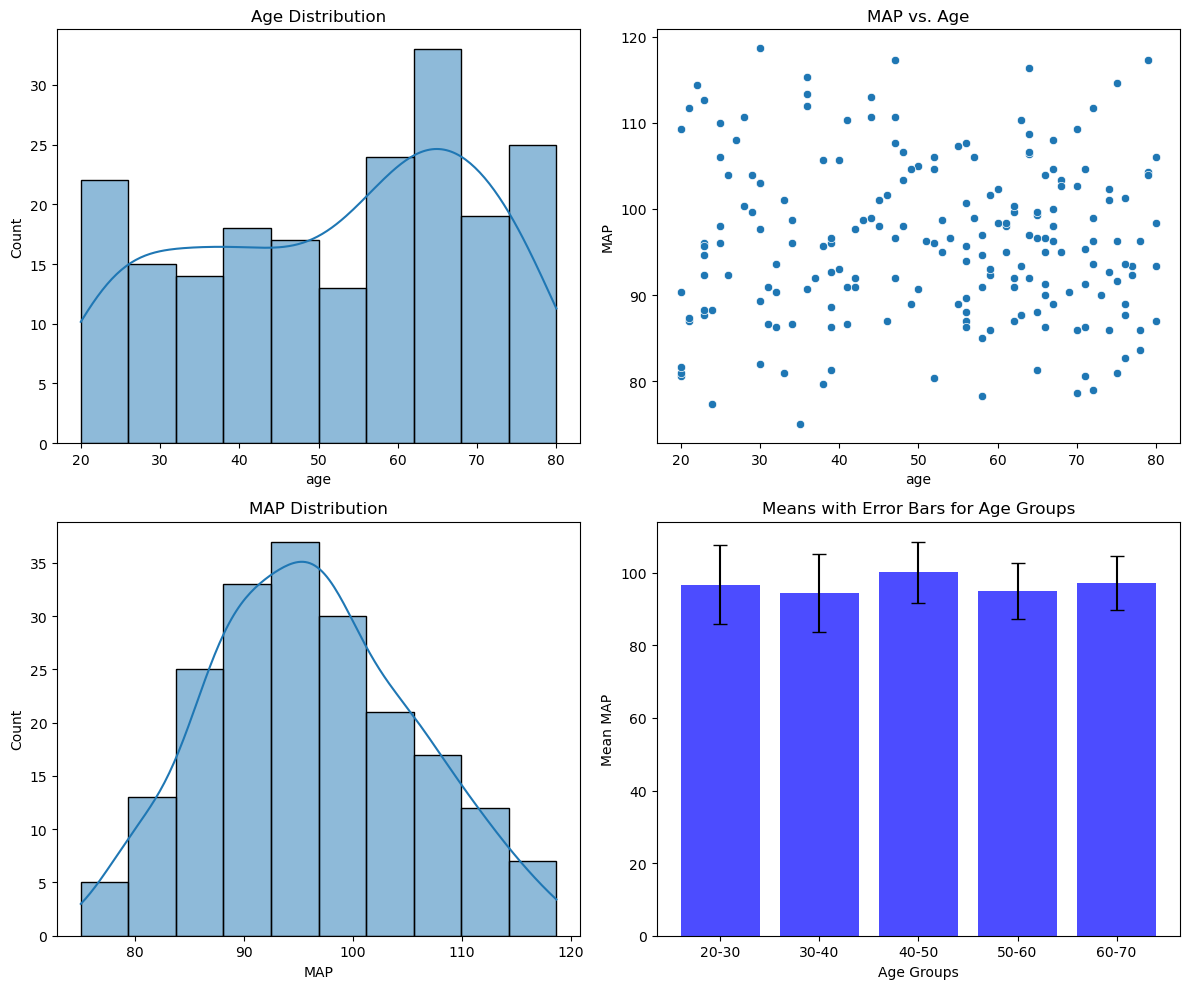

In [15]:
# to make graphing our histograms easier, we'll use the seaborn library
import seaborn as sns
# Create a 4-subplot figure
plt.figure(figsize=(12, 10))

# Subplot 1: Age distribution histogram
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', bins=10, kde=True)
plt.title("Age Distribution")

# Subplot 2: MAP vs. Age scatter plot
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='age', y='MAP')
plt.title("MAP vs. Age")

# Subplot 3: MAP histogram
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='MAP', bins=10, kde=True)
plt.title("MAP Distribution")

# Subplot 4: One-way ANOVA
plt.subplot(2, 2, 4)
anova_result = stats.f_oneway(
    df[df['AgeGroup'] == '20-30']['MAP'],
    df[df['AgeGroup'] == '30-40']['MAP'],
    df[df['AgeGroup'] == '40-50']['MAP'],
    df[df['AgeGroup'] == '50-60']['MAP'],
    df[df['AgeGroup'] == '60-70']['MAP']
)

p_value = anova_result.pvalue
significance = ""
if p_value < 0.05:
    significance = "*"
    
age_group_means = df.groupby('AgeGroup')['MAP'].mean()
age_group_std = df.groupby('AgeGroup')['MAP'].std()

plt.bar(age_labels, age_group_means, yerr=age_group_std, capsize=5, color='blue', alpha=0.7)
plt.title("Means with Error Bars for Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Mean MAP")
#plt.annotate(f"p-value {significance}", xy=(2, 25))

plt.tight_layout()
plt.show()